## Exercises large classes (Week_02)

## Python libraries and settings

In [1]:
# Python libraries
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Get working directory
print(os.getcwd())


/workspaces/data_analytics/WTYK/LC_02


### BigmacPrice.csv

In [13]:
# Read BigmacPrice.csv to data frame
df = pd.read_csv('BigmacPrice.csv', sep=',', encoding='utf-8')

# Print header
print(df.head())

# Show data types
print('\n', df.dtypes)

# Show type of 'df'
print('\n', type(df))


         date currency_code       name  local_price  dollar_ex  dollar_price
0  2000-04-01           ARS  Argentina         2.50          1          2.50
1  2000-04-01           AUD  Australia         2.59          1          2.59
2  2000-04-01           BRL     Brazil         2.95          1          2.95
3  2000-04-01           GBP    Britain         1.90          1          1.90
4  2000-04-01           CAD     Canada         2.85          1          2.85

 date              object
currency_code     object
name              object
local_price      float64
dollar_ex          int64
dollar_price     float64
dtype: object

 <class 'pandas.core.frame.DataFrame'>


### ChickenData.xlsx

In [16]:
# Read ChickenData.xlsx to data frame
df = pd.read_excel('ChickenData.xlsx', sheet_name='Sheet1')

# Print header
print(df.head())

# Show data types
print('\n', df.dtypes)

# Show type of 'df'
print('\n', type(df))

# Create dictionary from the data frame with breed (keys) and eggs_per_year (values)
dict = df.set_index('breed')['eggs_per_year'].to_dict()

# Print the dictionary
print('\n', dict)

   chicken_id       weight              breed  eggs_per_year
0           1  2728.854920  New Hampshire Red            158
1           2  2323.761365         Australorp            273
2           3  2635.062034  New Hampshire Red            153
3           4  2603.985152      Plymouth Rock            268
4           5  3079.394487         Australorp            360

 chicken_id         int64
weight           float64
breed             object
eggs_per_year      int64
dtype: object

 <class 'pandas.core.frame.DataFrame'>

 {'New Hampshire Red': 297, 'Australorp': 213, 'Plymouth Rock': 314, 'Barnevelder': 316, 'ISA Brown': 225}


### Cars_autoscout24.csv

In [28]:
# Linux commands to get/set encoding of file (run in terminal)
# file -i Cars_autoscout24.csv
# --> provides 'charset=unknown-8bit'
# --> download the file and open with e.g. Notepad++ (on Windows)
# --> shows ANSI which is "windows-1252" (see https://de.wikipedia.org/wiki/Windows-1252)

# Convert to UTF-8, if needed, otherwise, use encoding='cp1252' in pd.read_csv
# iconv -f "windows-1252" -t "UTF-8" Cars_autoscout24.csv -o Cars_autoscout24_utf8.csv

# Read Cars_autoscout24.csv to data frame
df = pd.read_csv('Cars_autoscout24.csv', sep=';', encoding='cp1252')
print(df.head())

# Function to extract numerical values from the column 'Price'
extract_price = lambda x: re.sub(r'\D', '', x)

# Apply the function to the column 'Price' and create a new column 'Price_numeric'
df['Price_numeric'] = df['Price'].apply(extract_price)

# Display the DataFrame
print(df.head())

   Offer_Id                                               Type         Price  \
0   7324420  AUDI A5 Sportback 3.0 TDI quattro S-tronic (Li...  CHF 22'500.–   
1   7512768        MERCEDES-BENZ SLK 200 7G-Tronic (Cabriolet)  CHF 23'749.–   
2   7512034  MERCEDES-BENZ C 350 Avantgarde 4Matic 7G-Troni...  CHF 18'500.–   
3   7512728  MERCEDES-BENZ A 45 AMG 4Matic Speedshift 7G-DC...  CHF 36'000.–   
4   7490242  AUDI A5 Sportback 2.0 TFSI Sport quattro S-tro...  CHF 48'500.–   

       PS Init_Regist   Kilometer Fuel_Type                    Transmission  
0  245 PS     10.2014   75'000 km    Diesel  Automatisiertes Schaltgetriebe  
1  184 PS      6.2013   46'655 km    Benzin             Automat sequentiell  
2  306 PS      6.2011  138'955 km    Benzin             Automat sequentiell  
3  360 PS      8.2015   43'000 km    Benzin  Automatisiertes Schaltgetriebe  
4  252 PS      9.2018   43'300 km    Benzin  Automatisiertes Schaltgetriebe  
   Offer_Id                                        

### Histogram of car prices

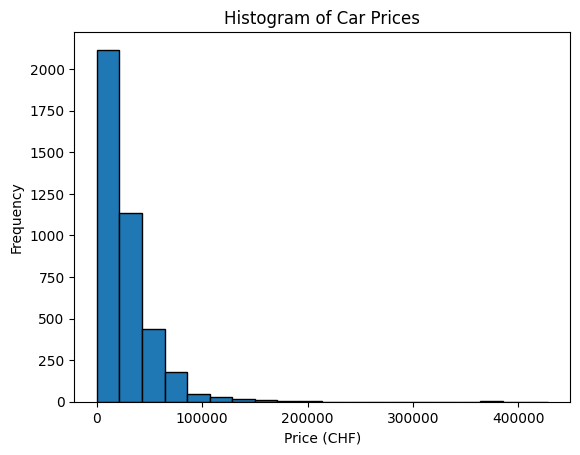

In [27]:
# Plotting the histogram of car prices
plt.hist(df['Price_numeric'].astype(int), bins=20, edgecolor='black')
plt.title('Histogram of Car Prices')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.show()